In [6]:
#import numpy for numerical computing
import numpy as np

#import pandas for Dataframes
import pandas as pd

#Matplotlib for Visualization
from matplotlib import pyplot as plt

#for displaying graph in the notebook
%matplotlib inline

#
import seaborn as sns

#for compatibility with python 3 remove the # sign from below line
#from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [7]:
#read the csv file
df=pd.read_csv('ABT.csv')

In [8]:
#check shape
df.shape

(148556, 11)

In [9]:
#check dtypes
df = df.drop(df.columns[0], axis=1)
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Job_Family_r         object
dtype: object

In [10]:
#check the initial 10 records 
df.head(5)



,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Job_Family_r
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,Management
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,Police Services
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,Police Services
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,Skilled Labor
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,Management


In [11]:
print(df['Job_Family_r'].unique().shape[0])
print(df['Job_Family_r'].unique())

54
['Management' 'Police Services' 'Skilled Labor'
 'Administrative & Mgmt (Unrep)' 'Fire Services'
 'Lab, Pharmacy & Med Techs' 'Journeyman Trade' 'Nursing' 'Legal & Court'
 'Port Operation' 'Medical & Dental' 'Street Transit'
 'Correction & Detention' 'Supervisory-Labor & Trade'
 'Pub Relations & Spec Assts' 'SF Superior Court'
 'Public Safety Inspection' 'Personnel' 'Sub-Professional Engineering'
 'Construction Project Mgmt' 'Information Systems'
 'Professional Engineering' 'Administrative-Labor & Trades'
 'Semi-Skilled & General Labor' 'Probation & Parole' 'Appraisal & Taxation'
 'Administrative-DPW/PUC' 'Revenue' 'Protection & Apprehension'
 'Construction Inspection' 'Public Health' 'Airport Operation'
 'Med Therapy & Auxiliary' 'Computer Operatns & Repro Svcs'
 'Energy & Environment' 'Property Administration'
 'Purchasing & Storekeeping' 'Human Services'
 'Health & Sanitation Inspection' 'Budget, Admn & Stats Analysis'
 'Payroll, Billing & Accounting' 'Clerical, Secretarial & Ste

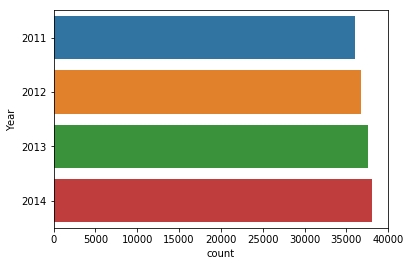

In [12]:
sns.countplot(y='Year', data=df)

# Split dataset and reterive data for year 2011 and 2014

In [13]:
df_11 = df.loc[df['Year']==2011]
df_14 = df.loc[df['Year']==2014]

In [14]:
df_11.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Job_Family_r
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,Management
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,Police Services
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,Police Services
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,Skilled Labor
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,Management


# Generate inflation value for each job family 

In [18]:
# family inflation
df_11_family = pd.DataFrame(df_11.groupby(['Job_Family_r'])['TotalPay'].mean().reset_index())
df_14_family = pd.DataFrame(df_14.groupby(['Job_Family_r'])['TotalPay'].mean().reset_index())
df_result_family = pd.merge(df_11_family, df_14_family, on='Job_Family_r', how='inner')
df_result_family['inflation'] = ((df_result_family.TotalPay_y - df_result_family.TotalPay_x)/df_result_family.TotalPay_x)*100

In [19]:
print(df_result_family.shape)
df_result_family.head()

(53, 4)


,Job_Family_r,TotalPay_x,TotalPay_y,inflation
0,Administrative & Mgmt (Unrep),192103.626667,230986.384000,20.240512
1,Administrative Secretarial,66306.676364,68554.178000,3.389556
2,Administrative-DPW/PUC,109965.973721,118400.258537,7.669904
3,Administrative-Labor & Trades,125672.370625,132268.000833,5.248274
4,Agriculture & Horticulture,55473.200940,57965.172071,4.492207


# Generate inflation values for each job title

In [23]:
# title inflation
df_11_title = pd.DataFrame(df_11.groupby(['JobTitle'])['TotalPay'].mean().reset_index())
df_14_title = pd.DataFrame(df_14.groupby(['JobTitle'])['TotalPay'].mean().reset_index())
df_11_title['JobTitle'] = df_11_title['JobTitle'].str.lower()
df_14_title['JobTitle'] = df_14_title['JobTitle'].str.lower()
df_result_title = pd.merge(df_11_title, df_14_title, on='JobTitle', how='inner')
df_result_title['inflation'] = ((df_result_title.TotalPay_y - df_result_title.TotalPay_x)/df_result_title.TotalPay_x)*100

In [24]:
print(df_result_title.shape)
df_result_title.head()

(471, 4)


,JobTitle,TotalPay_x,TotalPay_y,inflation
0,account clerk,44035.664337,37681.233226,-14.430192
1,accountant intern,29031.742917,21808.904545,-24.879107
2,acupuncturist,67594.400000,79495.000000,17.605896
3,administrative analyst,63954.867527,68110.002231,6.496980
4,administrative engineer,127961.430000,140187.692000,9.554646


In [25]:
df_result_family.to_csv('inflation_family.csv', index=None)
df_result_title.to_csv('inflation_title.csv', index=None)